In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from python_files.constants import PARTICIPANTS

In [2]:
df = pd.read_csv("./data/analysis/chat.csv", index_col=0)
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")
df

,datetime,participant,type,message,edited,calls_meta,deleted,view_once
0,2024-02-16 20:13:00,Mariana,message,Oigan,False,False,False,False
1,2024-02-16 20:13:00,Mariana,message,Vengan a mi U,False,False,False,False
2,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False
3,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False
4,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False
...,...,...,...,...,...,...,...,...
59100,2025-02-23 09:05:00,Mariana,message,"No, hinchazón",False,False,False,False
59101,2025-02-23 09:06:00,Mariana,message,Wow,False,False,False,False
59102,2025-02-23 09:06:00,Mariana,message,Buenos días,False,False,False,False
59103,2025-02-23 10:01:00,JuanD,message,Buenos días,False,False,False,False


## Palabras por mensaje

Muy parecido a lo que se hizo con los mensajes en [003_plots_for_messages.ipynb](./003_plots_for_messages.ipynb), pero quizás sea una métrica más correcta el decir quién dice más palabras por día. Porque, al final, puedo decir lo mismo en muchos mensajes, mientras que se pudo resumir en uno solo. Igual creo que ganaré yo (JuanD)

### Conteo de palabras

In [3]:
def count_words(index: int) -> int:
    """
    Count the number of words in a message

    Args
        index (int): the index of the message at the dataframe `df`
    
    Returns
        int: the number of words in the message
    """

    tmp = df.loc[index]
    if tmp["type"] != "message":
        return 0
    return len(tmp["message"].split())


words_per_message = list(map(lambda x: count_words(x), df.index))
df["words"] = words_per_message
df

,datetime,participant,type,message,edited,calls_meta,deleted,view_once,words
0,2024-02-16 20:13:00,Mariana,message,Oigan,False,False,False,False,1
1,2024-02-16 20:13:00,Mariana,message,Vengan a mi U,False,False,False,False,4
2,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False,1
3,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False,1
4,2024-02-16 20:13:00,Negron,message,Apoyo,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...
59100,2025-02-23 09:05:00,Mariana,message,"No, hinchazón",False,False,False,False,2
59101,2025-02-23 09:06:00,Mariana,message,Wow,False,False,False,False,1
59102,2025-02-23 09:06:00,Mariana,message,Buenos días,False,False,False,False,2
59103,2025-02-23 10:01:00,JuanD,message,Buenos días,False,False,False,False,2


In [4]:
count_df = df.groupby("datetime").count().reset_index()
words_sumed = df.groupby("datetime").sum().reset_index()

count_df = count_df[["datetime", "message"]]
count_df["words"] = words_sumed["words"]
count_df = count_df[count_df["words"] > 0]
count_df

,datetime,message,words
0,2024-02-16 20:13:00,5,8
1,2024-02-16 20:14:00,2,2
2,2024-02-16 20:15:00,1,1
3,2024-02-16 20:18:00,2,9
4,2024-02-16 20:19:00,2,5
...,...,...,...
19036,2025-02-23 08:48:00,1,1
19037,2025-02-23 09:05:00,1,2
19038,2025-02-23 09:06:00,2,3
19039,2025-02-23 10:01:00,1,2


In [5]:
count_participant_df = df.groupby(["datetime", "participant"]).count().reset_index()
words_sumed = df.groupby(["datetime", "participant"]).sum().reset_index()

count_participant_df = count_participant_df[["datetime", "participant", "message"]]
count_participant_df["words"] = words_sumed["words"]
count_participant_df = count_participant_df[count_participant_df["words"] > 0]
count_participant_df

,datetime,participant,message,words
0,2024-02-16 20:13:00,Mariana,2,5
1,2024-02-16 20:13:00,Negron,3,3
2,2024-02-16 20:14:00,Hombre Religioso,2,2
3,2024-02-16 20:15:00,Mariana,1,1
4,2024-02-16 20:18:00,JuanD,2,9
...,...,...,...,...
29343,2025-02-23 08:48:00,Alana,1,1
29344,2025-02-23 09:05:00,Mariana,1,2
29345,2025-02-23 09:06:00,Mariana,2,3
29346,2025-02-23 10:01:00,JuanD,1,2


In [6]:
# DataFrames para el promedio total y por participante por cada día
mean_total_df = pd.DataFrame(columns=["datetime", "total"])
mean_participant_df = pd.DataFrame(columns=["datetime", "participant", "total"])

# DataFrames para la suma total y por participante por cada día
sum_total_df = pd.DataFrame(columns=["datetime", "total"])
sum_participant_df = pd.DataFrame(columns=["datetime", "participant", "total"])

# Contadores
cont_total = 0
cont_participant = 0

# Inicializar las fechas de inicio y fin
start_date = count_df["datetime"].min()
end_date = count_df["datetime"].max()

# Quitar las horas de las fechas y agregar un día extra a la fecha final
start_date = start_date - pd.Timedelta(hours=start_date.hour, minutes=start_date.minute, seconds=start_date.second)
end_date = end_date - pd.Timedelta(hours=end_date.hour, minutes=end_date.minute, seconds=end_date.second) + pd.Timedelta(days=1)

# Crear un rango de fechas
date_range = pd.date_range(start=start_date, end=end_date, freq='1D')

for i in range(1, len(date_range)):
    date_interval = (date_range[i - 1], date_range[i])

    total_tmp_df = count_df[(count_df["datetime"] >= date_interval[0]) & (count_df["datetime"] < date_interval[1])]
    participant_tmp_df = count_participant_df[
        (count_participant_df["datetime"] >= date_interval[0]) &
        (count_participant_df["datetime"] < date_interval[1])
    ]

    total_tmp_df = total_tmp_df.groupby("datetime").sum().reset_index()[["datetime", "words"]]
    participant_tmp_df = participant_tmp_df.groupby(["datetime", "participant"]).sum().reset_index()[["datetime", "participant", "words"]]

    mean_total_df.loc[cont_total] = [date_interval[0], total_tmp_df["words"].mean()]
    sum_total_df.loc[cont_total] = [date_interval[0], total_tmp_df["words"].sum()]
    cont_total += 1

    for participant in PARTICIPANTS:
        mean_participant_df.loc[cont_participant] = [date_interval[0], participant, participant_tmp_df[participant_tmp_df["participant"] == participant]["words"].mean()]
        sum_participant_df.loc[cont_participant] = [date_interval[0], participant, participant_tmp_df[participant_tmp_df["participant"] == participant]["words"].sum()]
        cont_participant += 1

mean_total_df["datetime"] = pd.to_datetime(mean_total_df["datetime"], format="%Y-%m-%d")
mean_participant_df["datetime"] = pd.to_datetime(mean_participant_df["datetime"], format="%Y-%m-%d")

In [7]:
# Promedios generales
print(f"Promedio de palabras totales enviados por día  ==>  {sum_total_df['total'].mean()} palabras/día")

for participant in PARTICIPANTS:
    tmp_df = sum_participant_df[sum_participant_df["participant"] == participant]
    print(f"Media de palabras totales enviados por: {participant}  ==>  {tmp_df['total'].mean()} palabras/día")

Promedio de palabras totales enviados por día  ==>  548.307486631016 palabras/día
Media de palabras totales enviados por: JuanD  ==>  151.58288770053477 palabras/día
Media de palabras totales enviados por: Mariana  ==>  168.7192513368984 palabras/día
Media de palabras totales enviados por: Hombre Religioso  ==>  54.80748663101604 palabras/día
Media de palabras totales enviados por: Alana  ==>  115.10160427807487 palabras/día
Media de palabras totales enviados por: Negron  ==>  58.096256684491976 palabras/día


### Gráficas

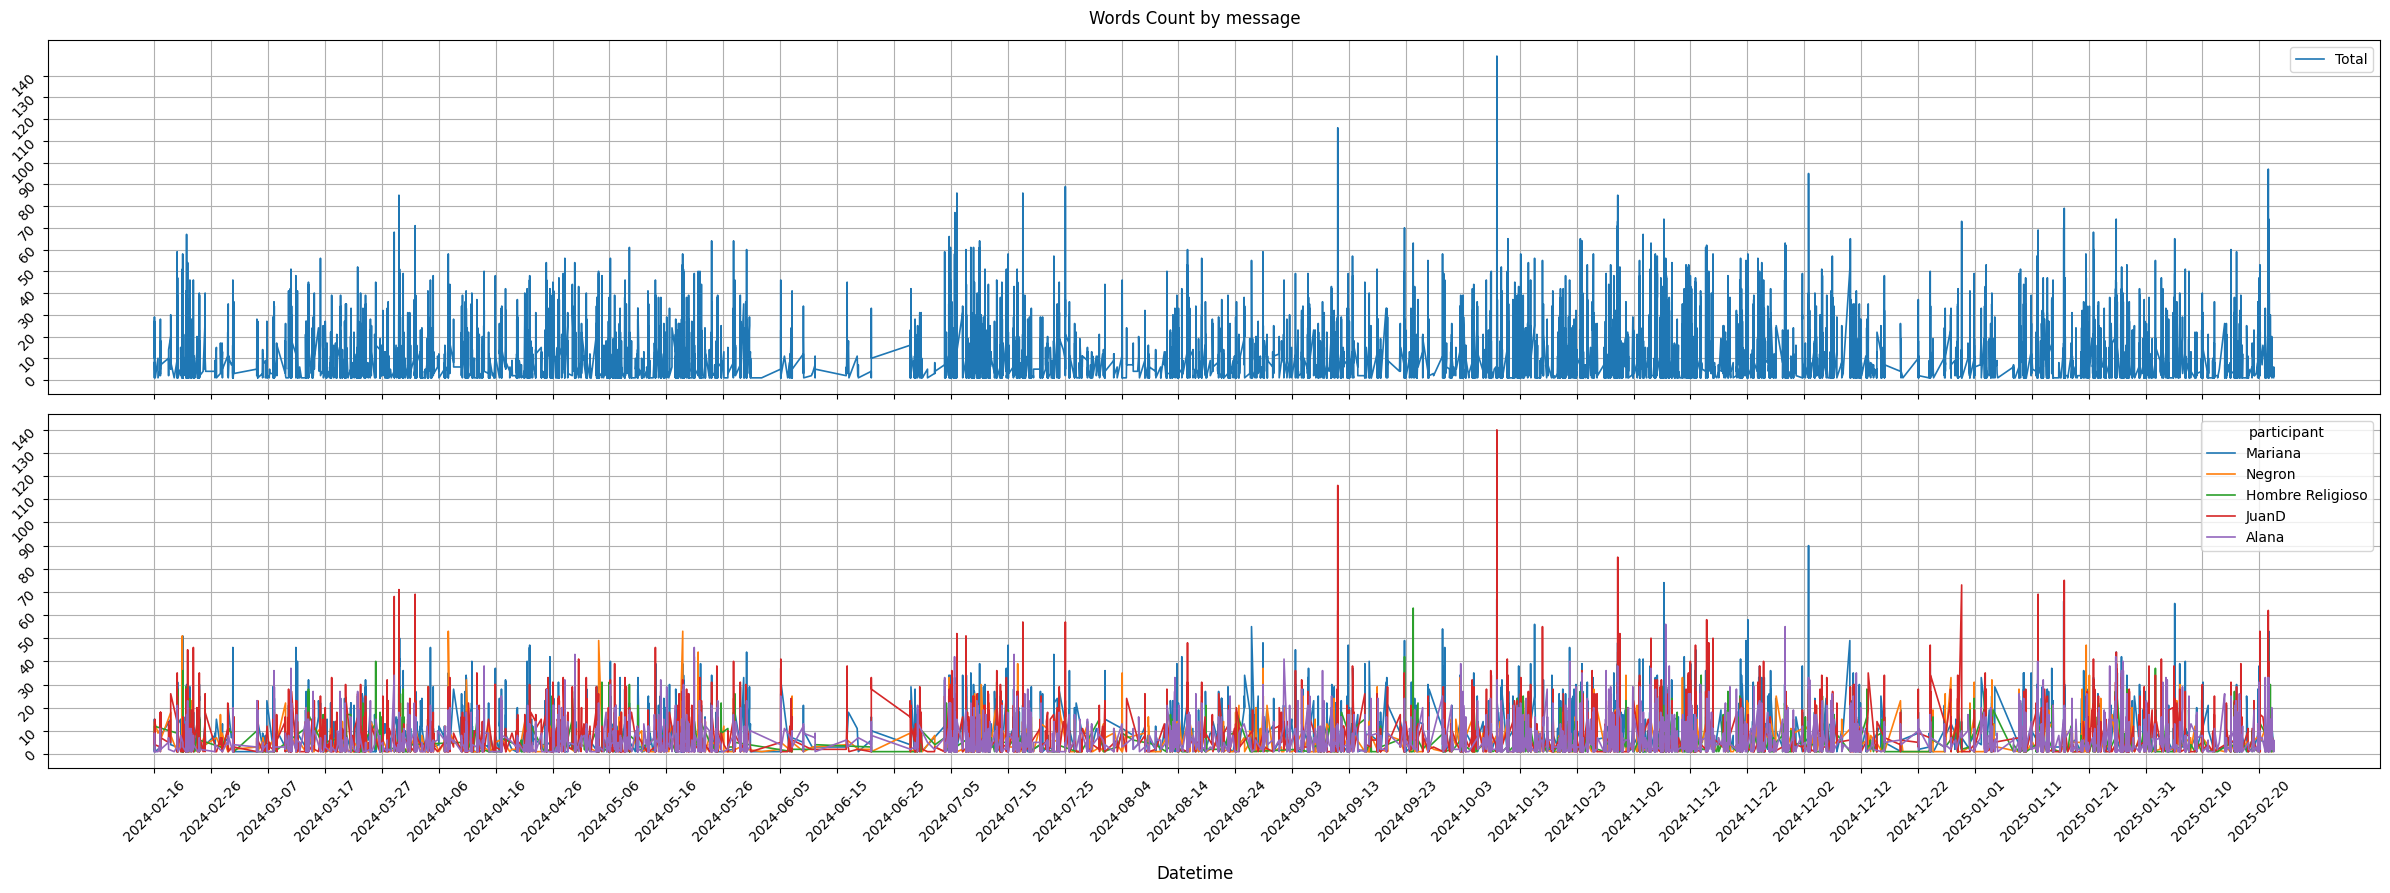

In [8]:
xticks = pd.date_range(start=count_df["datetime"].min(), end=count_df["datetime"].max(), freq='10D')
yticks = range(0, count_df["words"].max() + 1, 10)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(24, 9), sharex=True)

sns.lineplot(data=count_df, x="datetime", y="words", linewidth=1.2, label="Total", ax=ax1)
sns.lineplot(data=count_participant_df, x="datetime", y="words", hue="participant", linewidth=1.2, ax=ax2)

# Configuring first axes
ax1.set(xlabel="", ylabel="", yticks=yticks)
ax1.set_yticklabels(yticks, rotation=45)
ax1.grid()
ax1.legend()

# Configuring second axes
ax2.set(xlabel="", ylabel="", xticks=xticks, yticks=yticks)
ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45)
ax2.set_yticklabels(yticks, rotation=45)
ax2.grid()

# Configuring figure
fig.suptitle("Words Count by message")
fig.supxlabel("Datetime")
fig.tight_layout()

plt.show()

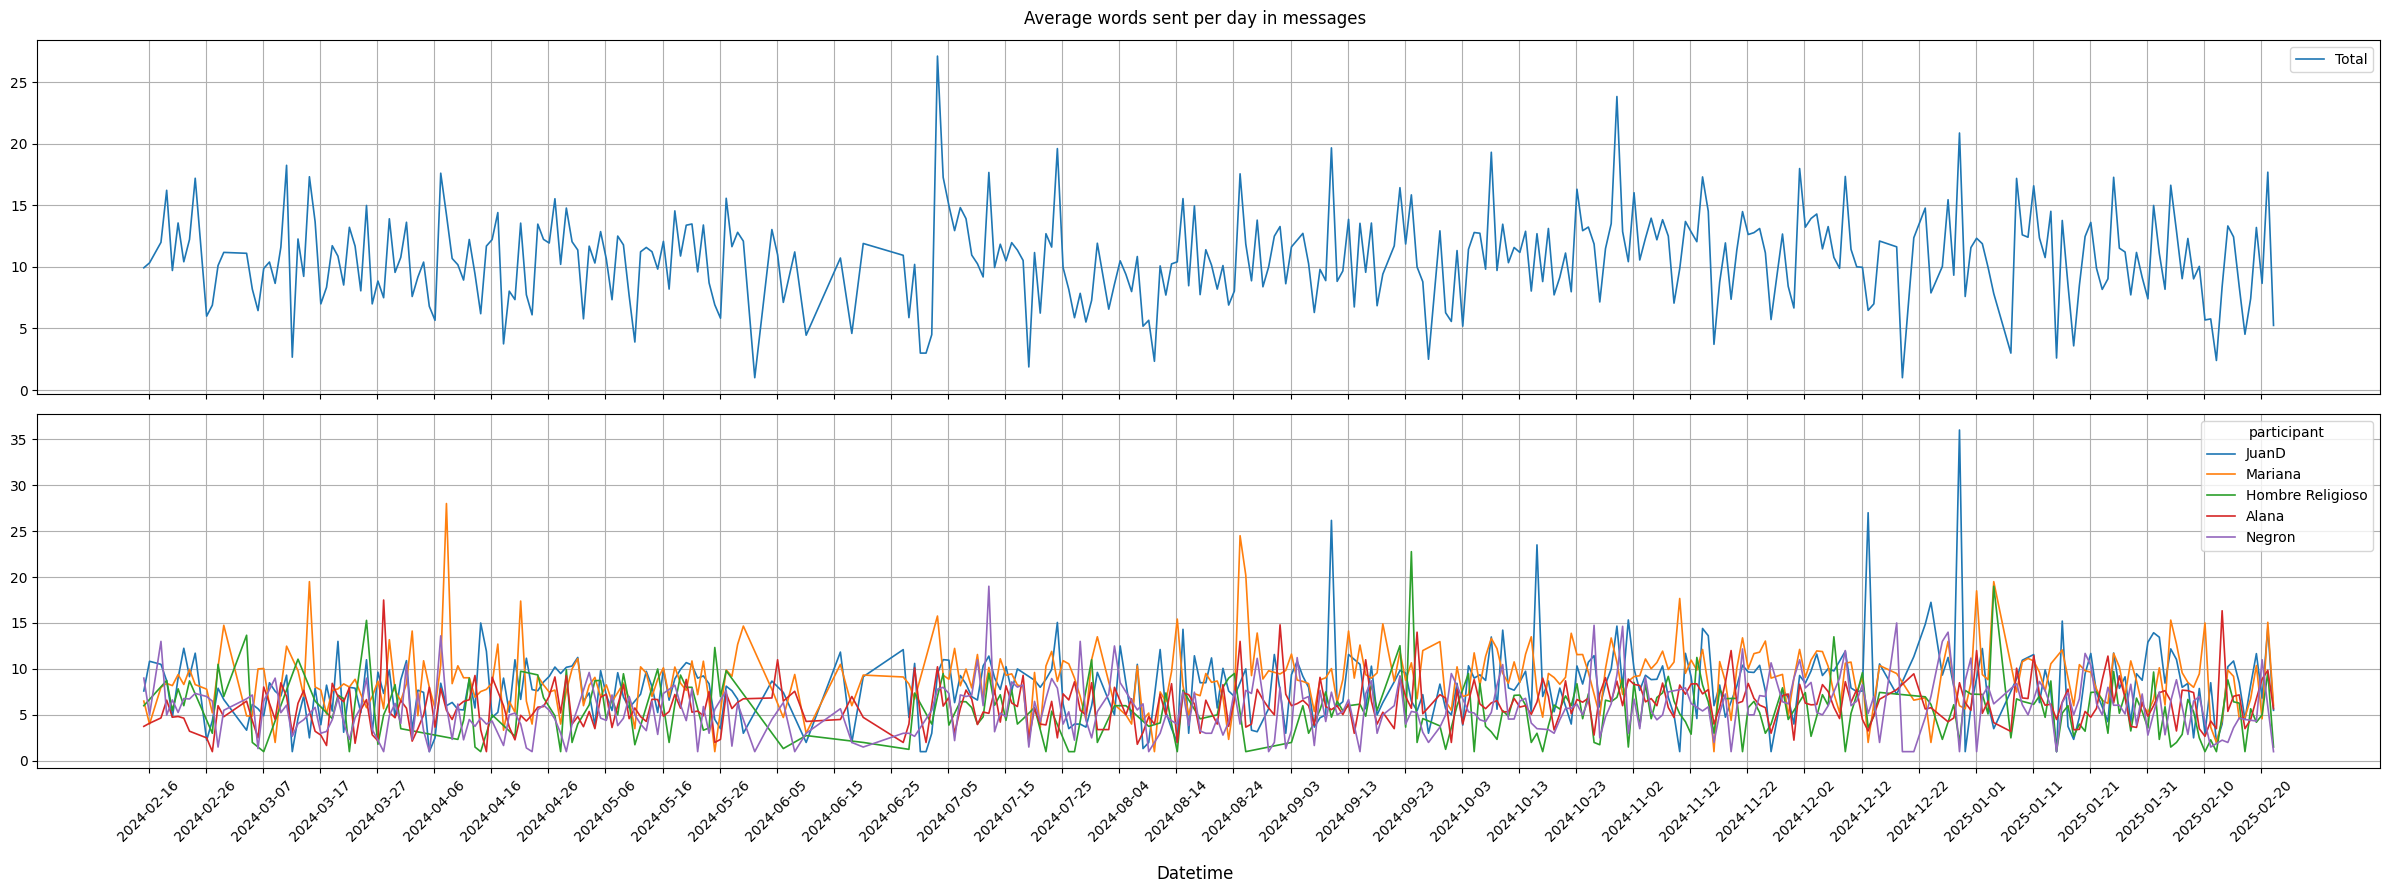

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(24, 9), sharex=True)

kwargs = {"linewidth": 1.2}

sns.lineplot(data=mean_total_df, x="datetime", y="total", label="Total", ax=ax1, **kwargs)
sns.lineplot(data=mean_participant_df, x="datetime", y="total", hue="participant", ax=ax2, **kwargs)

# Configuring first axes
ax1.set(xlabel="", ylabel="")
ax1.grid()
ax1.legend()

# Configuring second axes
ax2.set(xlabel="", ylabel="", xticks=xticks)
ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45)
ax2.grid()

# Configuring figure
fig.suptitle("Average words sent per day in messages")
fig.supxlabel("Datetime")
fig.tight_layout()
plt.show()

## Extra

Es interesante ver otra cosa, aparte de las gráficas anteriores, es el ratio de palabras por mensaje. Todo el código anterior fue copiado y pegado, así que solo sería crear funciones para evitar duplicado de líneas.

No es del todo acertado, porque, como se puede ver, en la misma fecha y hora se toma el conteo de mensajes enviaods y se compara con el número de palabras de esos mensajes. Pero, hasta que no encuente otra forma mejor de sacar dicho ratio, lo dejaré así

In [10]:
count_df["ratio"] = count_df["words"] / count_df["message"]
count_participant_df["ratio"] = count_participant_df["words"] / count_participant_df["message"]
display(count_df, count_participant_df)

,datetime,message,words,ratio
0,2024-02-16 20:13:00,5,8,1.6
1,2024-02-16 20:14:00,2,2,1.0
2,2024-02-16 20:15:00,1,1,1.0
3,2024-02-16 20:18:00,2,9,4.5
4,2024-02-16 20:19:00,2,5,2.5
...,...,...,...,...
19036,2025-02-23 08:48:00,1,1,1.0
19037,2025-02-23 09:05:00,1,2,2.0
19038,2025-02-23 09:06:00,2,3,1.5
19039,2025-02-23 10:01:00,1,2,2.0


,datetime,participant,message,words,ratio
0,2024-02-16 20:13:00,Mariana,2,5,2.5
1,2024-02-16 20:13:00,Negron,3,3,1.0
2,2024-02-16 20:14:00,Hombre Religioso,2,2,1.0
3,2024-02-16 20:15:00,Mariana,1,1,1.0
4,2024-02-16 20:18:00,JuanD,2,9,4.5
...,...,...,...,...,...
29343,2025-02-23 08:48:00,Alana,1,1,1.0
29344,2025-02-23 09:05:00,Mariana,1,2,2.0
29345,2025-02-23 09:06:00,Mariana,2,3,1.5
29346,2025-02-23 10:01:00,JuanD,1,2,2.0


In [11]:
print(f"Promedio de palabras/mensaje totales  ==>  {count_df['ratio'].mean()} palabras/mensaje\n")
for participant in PARTICIPANTS:
    tmp_df = count_participant_df[count_participant_df["participant"] == participant]
    print(f"Promedio de palabras/mensaje por: {participant}  ==>  {tmp_df['ratio'].mean()} palabras/mensaje")

Promedio de palabras/mensaje totales  ==>  3.7641249803476446 palabras/mensaje

Promedio de palabras/mensaje por: JuanD  ==>  4.465567253502921 palabras/mensaje
Promedio de palabras/mensaje por: Mariana  ==>  3.940556616617743 palabras/mensaje
Promedio de palabras/mensaje por: Hombre Religioso  ==>  3.197171917389955 palabras/mensaje
Promedio de palabras/mensaje por: Alana  ==>  3.2352046326089834 palabras/mensaje
Promedio de palabras/mensaje por: Negron  ==>  4.312245796469453 palabras/mensaje


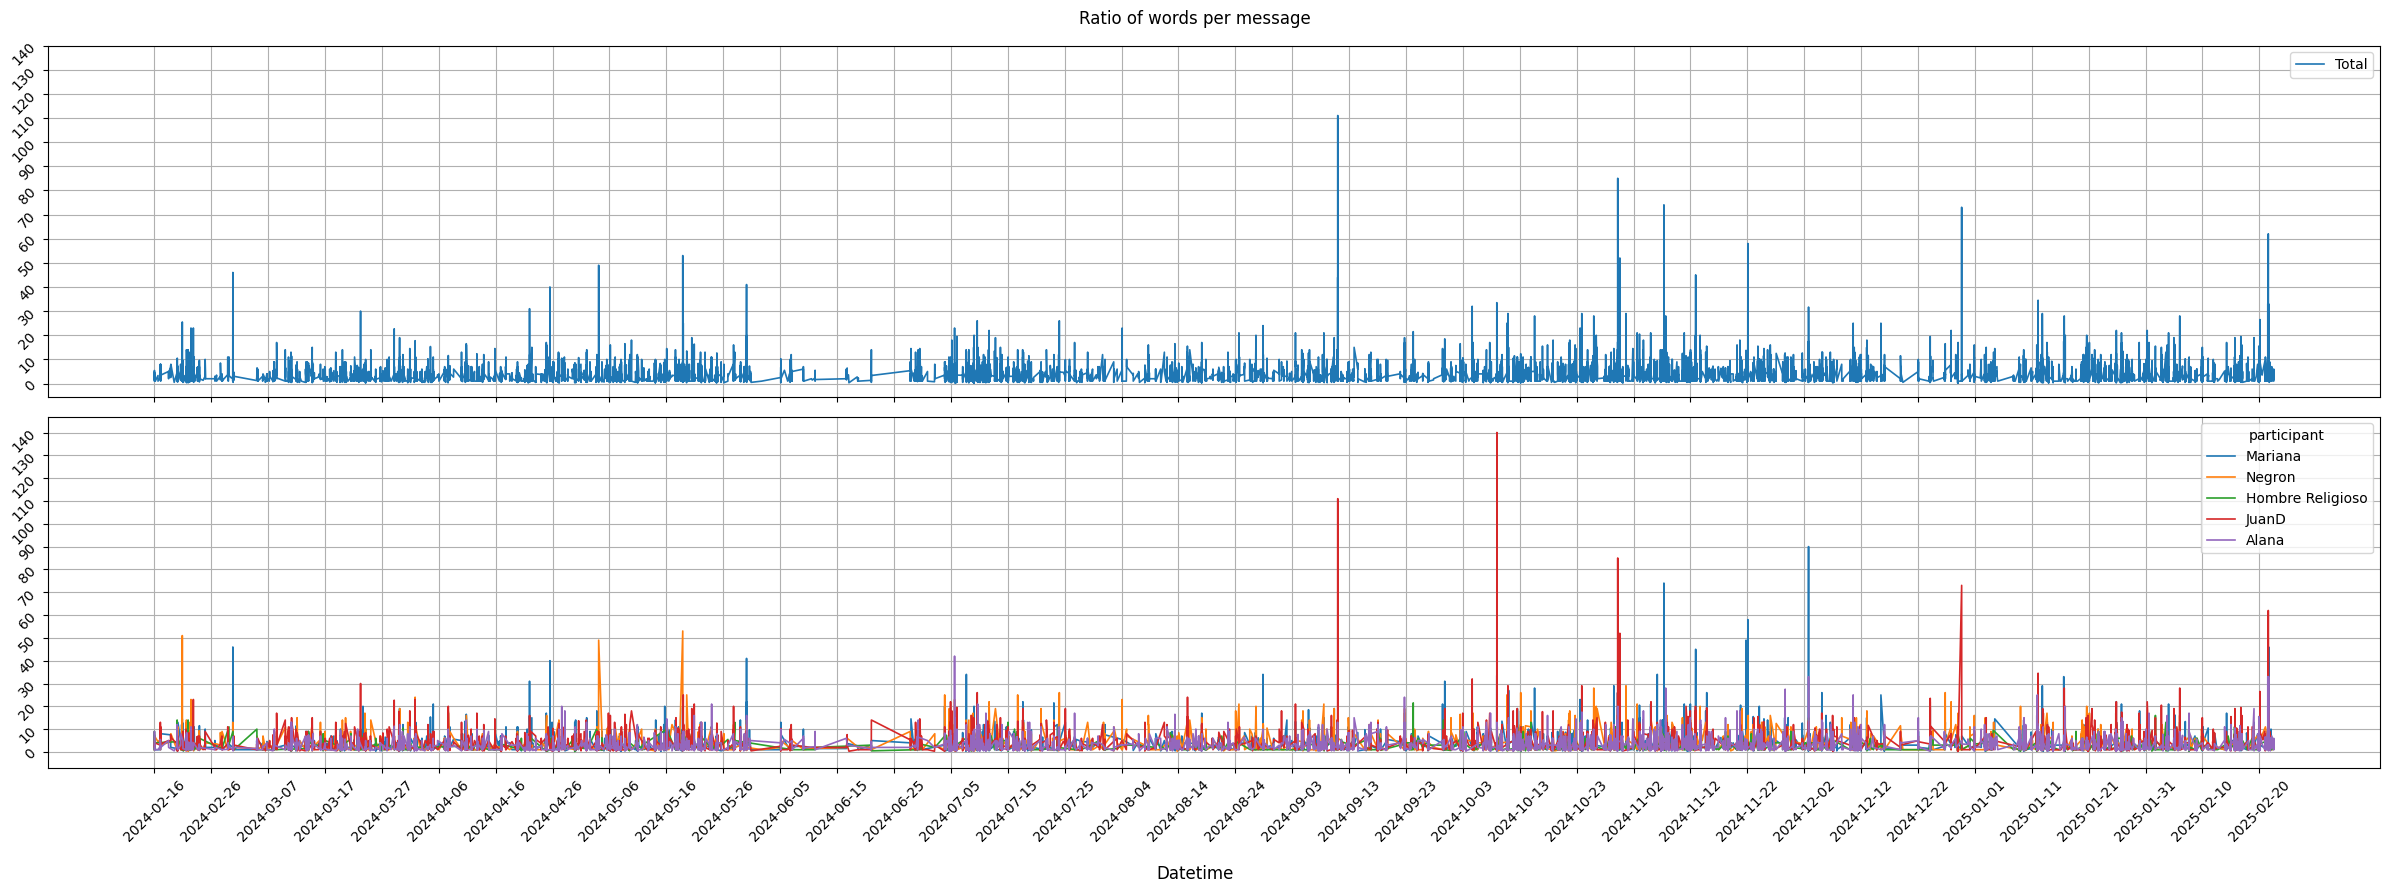

In [12]:
xticks = pd.date_range(start=count_df["datetime"].min(), end=count_df["datetime"].max(), freq='10D')
yticks = range(0, int(count_participant_df["ratio"].max()) + 2, 10)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(24, 9), sharex=True)

sns.lineplot(data=count_df, x="datetime", y="ratio", linewidth=1.2, label="Total", ax=ax1)
sns.lineplot(data=count_participant_df, x="datetime", y="ratio", hue="participant", linewidth=1.2, ax=ax2)

# Configuring first axes
ax1.set(xlabel="", ylabel="", yticks=yticks)
ax1.set_yticklabels(yticks, rotation=45)
ax1.grid()
ax1.legend()

# Configuring second axes
ax2.set(xlabel="", ylabel="", xticks=xticks, yticks=yticks)
ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45)
ax2.set_yticklabels(yticks, rotation=45)
ax2.grid()

# Configuring figure
fig.suptitle("Ratio of words per message")
fig.supxlabel("Datetime")
fig.tight_layout()

plt.show()